![Logo TUBAF](https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png)

Exercise material of the MSc-level course **Soil Dynamics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics


# Erdbebenwirkung in weichen Bodenschichten

Module laden

In [1]:
import sympy as sp
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact
from sympy.interactive import printing
import plot_functions.plot_settings
%run plot_functions/wave1d_earthquake_interaction.ipynb
printing.init_printing()
%load_ext ipydex.displaytools

_Last line enables special comment **##:** for LaTeX formatting of output_ 

## Stationärer Zustand

![wavebar_earthquake.png](https://github.com/nagelt/soil_dynamics/raw/master/Images/wavebar_earthquake.png)

Variablen für symbolische Rechnung deklarieren (sympy)

In [2]:
kappa, kappa2, omega, x, z, t, C1, C2, h, d, u0= sp.symbols('kappa kappa2 omega x z t C1 C2 h d u0')

Ansatz   $w(x,z,t)=f(z)\sin(\omega t - \kappa_2 x)$

In [3]:
f = C1*sp.cos(kappa*z) + C2*sp.sin(kappa*z)
dfdz = f.diff(z)

Koeffizienten $C_1$ und $C_2$ aus den Randbedingungen bestimmen: diskrete Randmasse oben, Verschiebungsverlauf unten.

In [4]:
c = omega/kappa
BCtop = (c**2)*dfdz.subs(z, 0) + (d*omega**2)*f.subs(z, 0)
BCbottom = f.subs(z, h) - u0
BCsol=sp.solve([BCtop, BCbottom], C1, C2)

Einsetzen der Lösung

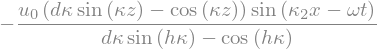

In [5]:
fsol = f.subs([(C1, BCsol[C1]), (C2, BCsol[C2])])
wsol = sp.simplify(fsol*sp.sin(omega*t - kappa2*x))
display(wsol)
#print(wsol)   # for safety if display fails

In [6]:
interactive_earthquake_plot()

interactive(children=(IntSlider(value=25, description='$t/T$: [%]', step=25), IntSlider(value=50, description=…

Wie ändert sich die Eigenfrequenz mit steigender Auflast? Vergleichen Sie diese Tendenz mit dem Einmassenschwinger.